In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
class KArmBandit:
    def __init__(self, K, epsilon=0.1, decay_rate=0.99):
        self.K = K
        self.epsilon = epsilon
        self.initial_epsilon = epsilon
        self.decay_rate = decay_rate
        self.counts = np.zeros(K)
        self.rewards = np.zeros(K)

    def select_arm(self):
        if random.random() < self.epsilon:
            return random.randint(0, self.K - 1)
        return np.argmax(self.rewards / (self.counts + 1e-5))

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.rewards[chosen_arm] += reward
        self.epsilon *= self.decay_rate

    def reset(self):
        self.epsilon = self.initial_epsilon
        self.counts = np.zeros(self.K)
        self.rewards = np.zeros(self.K)

    def run(self, num_iterations, reward_probabilities):
        total_reward = 0
        reward_history = []
        epsilon_history = []
        
        for _ in range(num_iterations):
            chosen_arm = self.select_arm()
            reward = 1 if random.random() < reward_probabilities[chosen_arm] else 0
            self.update(chosen_arm, reward)
            total_reward += reward
            reward_history.append(total_reward)
            epsilon_history.append(self.epsilon)
        
        return total_reward, reward_history, epsilon_history

In [4]:
def simulate_bandit(K=10, epsilon=0.1, decay_rate=0.99, num_iterations=1000, reward_probabilities=None):
    if reward_probabilities is None:
        reward_probabilities = np.random.rand(K)
    bandit = KArmBandit(K, epsilon, decay_rate)
    total_reward, reward_history, epsilon_history = bandit.run(num_iterations, reward_probabilities)
    
    print("Total Reward:", total_reward)
    print("Estimated Probabilities:", bandit.rewards / (bandit.counts + 1e-5))
    print("True Probabilities:", reward_probabilities)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(reward_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cumulative Reward")
    plt.title("Cumulative Reward Over Time")
    
    plt.subplot(1, 2, 2)
    plt.plot(epsilon_history)
    plt.xlabel("Iterations")
    plt.ylabel("Epsilon Value")
    plt.title("Epsilon Decay Over Time")
    
    plt.tight_layout()
    plt.show()
    return bandit

Total Reward: 1890
Estimated Probabilities: [0.33333278 0.92499977 0.4999975  0.8999991  0.95828988 0.24999938
 0.         0.1999996  0.16666639 0.        ]
True Probabilities: [0.16165703 0.94681127 0.50128126 0.78757848 0.96558464 0.14286504
 0.02787117 0.08490544 0.08665477 0.27170192]


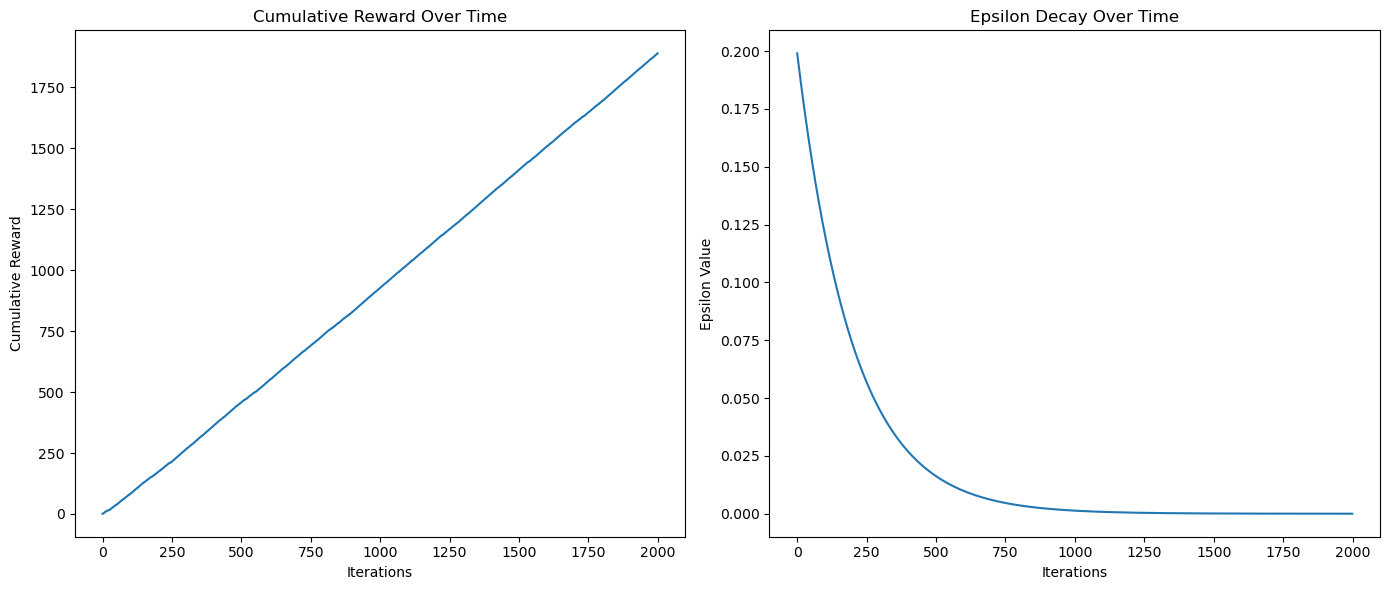

In [5]:
K = 10
epsilon = 0.2
decay_rate = 0.995
num_iterations = 2000
reward_probabilities = np.random.rand(K)

bandit = simulate_bandit(K, epsilon, decay_rate, num_iterations, reward_probabilities)
